<a href="https://colab.research.google.com/github/GenFPS/Algorithms-for-data-science/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Алгоритм UMAP (Uniform Manifold Approximation and Projection) - это алгоритм, используемы для снижения размерности. При снижении размерности UMAP сначала выполняет построение 
взвешенного графа, соединяя ребрами только те объекты, которые являются 
ближайшими соседями. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=9092912fb50f78e7a32ea8ffc9a360d7c6cbeb4dd5c1b280d9b15276d056cc0d
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=c2090da64980e59566fb147d10b483ff6f925084c95015e71b1a052ff21f4fc5
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
sns.set(style='white', rc={'figure.figsize':(12,8)})

# Построение графика на основе датасета FASHION MNIST

При первом построении были использованы базовые параметры **emdedding**

В качестве превого датасета используем датасет Fashion MNIST, который включает в себя 70000 черно-белых 
изображений различной одежды по 10 классам

## Кейс 1 (UMAP):
**базовые параметры**

4422102/4422102 [==============================] - 1s 0us/step


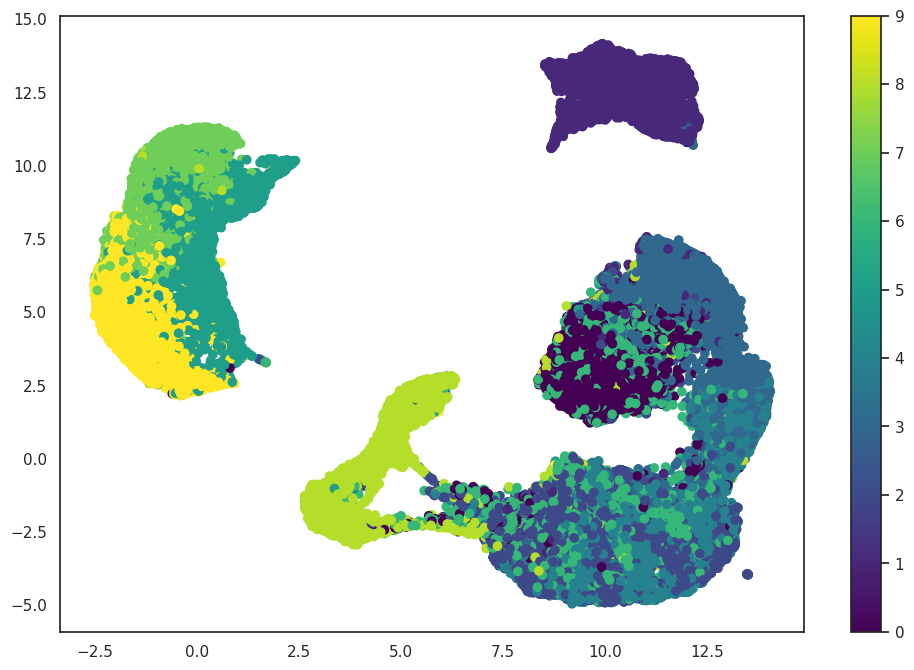

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# загрузим датасет Fashion Mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 784))
X_test = scaler.transform(X_test.reshape(-1, 784))

# применим алгоритм UMAP
umap_model = umap.UMAP() # в первом случае используем значения параметров по умолчанию
umap_embedding = umap_model.fit_transform(X_train)

# нарисуем scatter plot
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], c=y_train, cmap='viridis')
plt.colorbar()
plt.show()

Cуществуют эвристики, которые могут помочь при выборе значений параметров UMAP алгоритма. Одной из таких эвристик является выбор оптимального значения параметра min_dist, который контролирует сжатие кластеров при снижении размерности.

Для наглядности, протестируем различные значения для данного параметра

## Кейс 2:
**min_dist= 1**

In [ ]:
umap_model = umap.UMAP(n_neighbors= 5, min_dist= 1, metric='euclidean')
umap_embedding = umap_model.fit_transform(X_train)

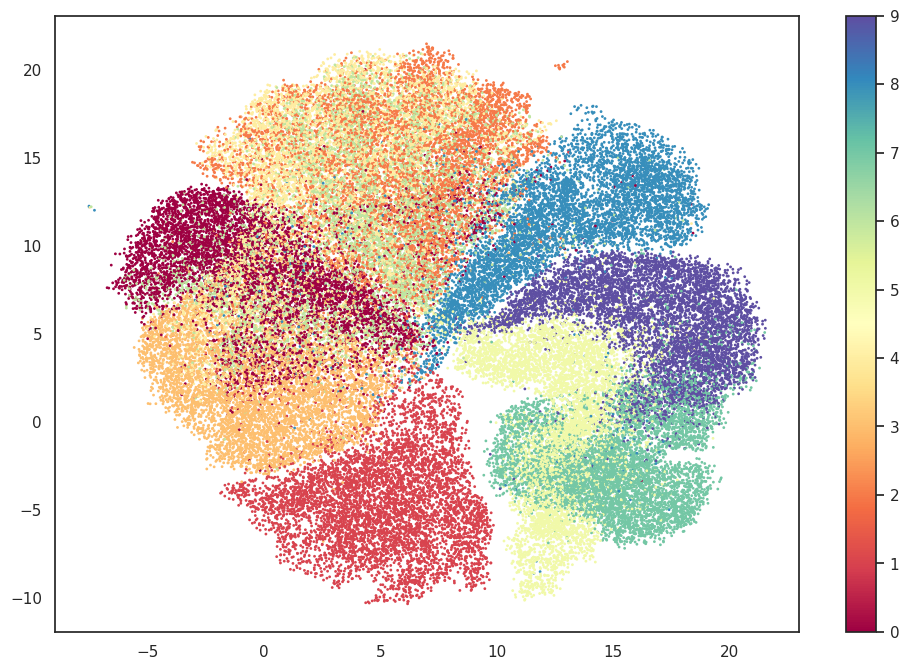

In [ ]:
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], c=y_train, cmap='Spectral', s=1)
plt.colorbar()
plt.show()

## Кейс 3:
**min_dist= 0.5**

In [ ]:
umap_model = umap.UMAP(n_neighbors= 5, min_dist= 0.5, metric='euclidean')
umap_embedding = umap_model.fit_transform(X_train)

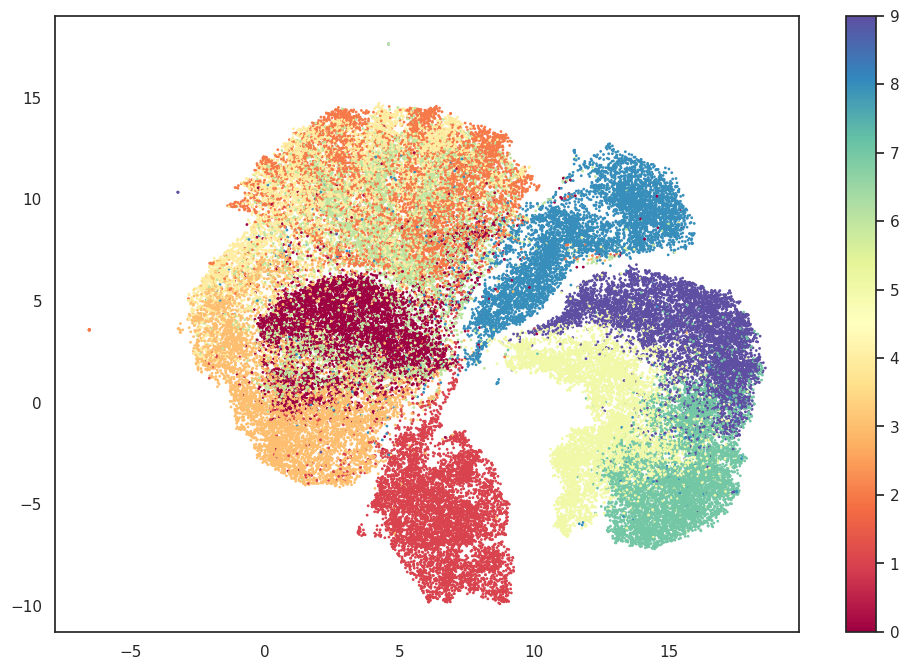

In [ ]:
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], c=y_train, cmap='Spectral', s=1)
plt.colorbar()
plt.show()

Кейс 3: **min_dist = 0.1**

In [ ]:
umap_model = umap.UMAP(n_neighbors= 5, min_dist= 0.1, metric='euclidean')
umap_embedding = umap_model.fit_transform(X_train)

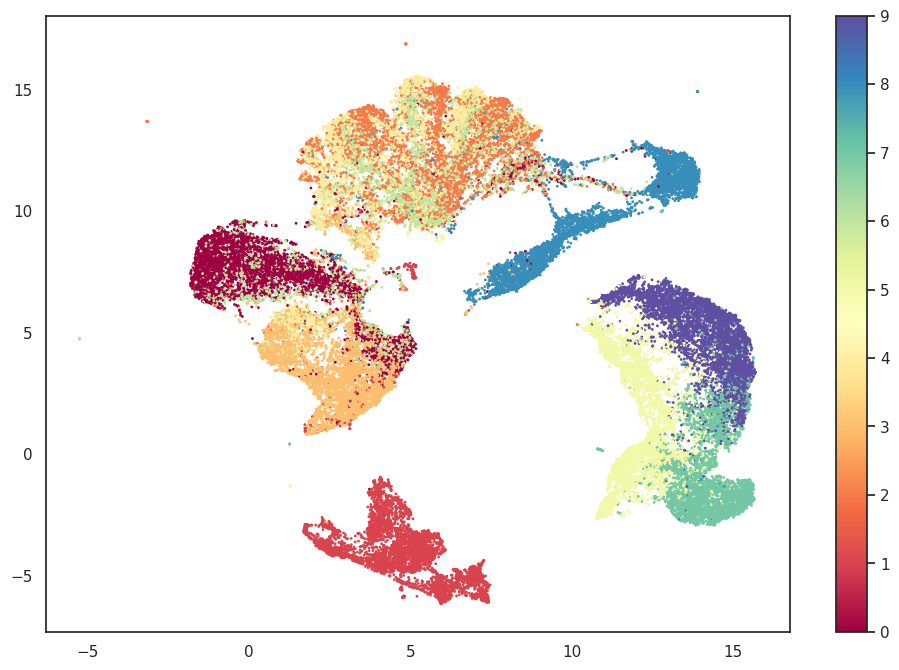

In [ ]:
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], c=y_train, cmap='Spectral', s=1)
plt.colorbar()
plt.show()

## Вывод по рисункам
Таким образом, можно сказать, что увеличение значения параметра приводит к отсутствию кластеризации, так как при значение **min_dist = 1** данные собираются в кучу.
Однако при значении  **min_dist = 0.1**, UMAP разделяет датасет на кластеры. Отчетливо это видно в **Кейсе 3**, где значения параметра **min_dist = 0.1**

# Датасет Penguin

## Кейс 1:

**Базовые параметры**

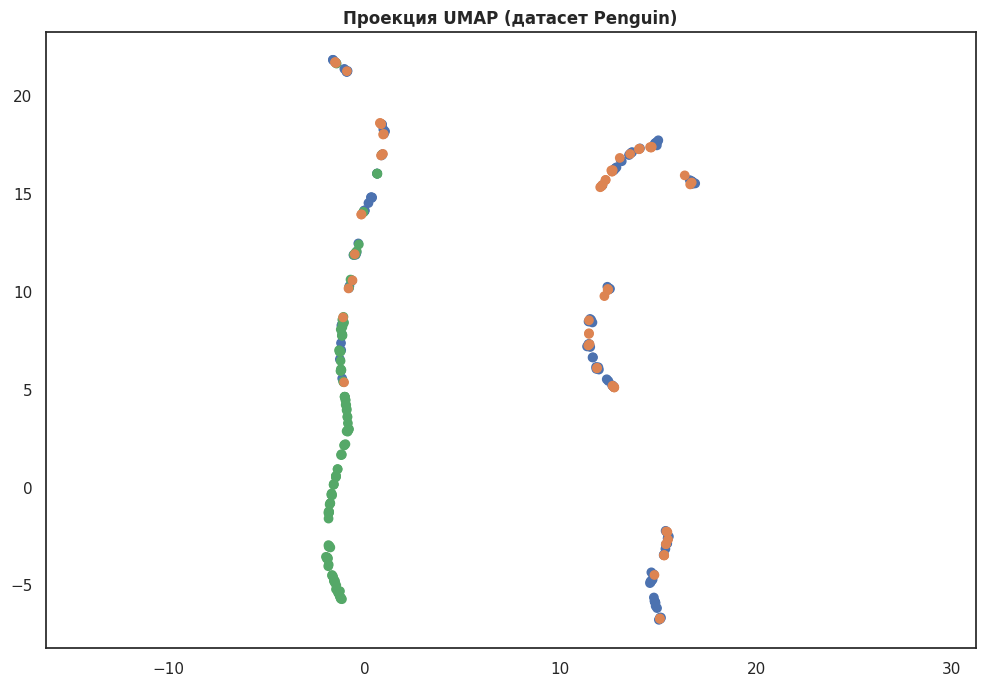

In [ ]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Загружаем датасет
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')


penguins = penguins.dropna()

# Удаляем строки с пропущенными значениями
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

# Используем UMAP
embedding = umap.UMAP().fit_transform(penguin_data)

# Создаем график
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Проекция UMAP (датасет Penguin)', fontsize=12, fontweight='bold')
plt.show()

## Кейс 2:
**min_dist= 1**

In [ ]:
embedding = umap.UMAP(n_neighbors=5, min_dist=1, metric= 'euclidean').fit_transform(penguin_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


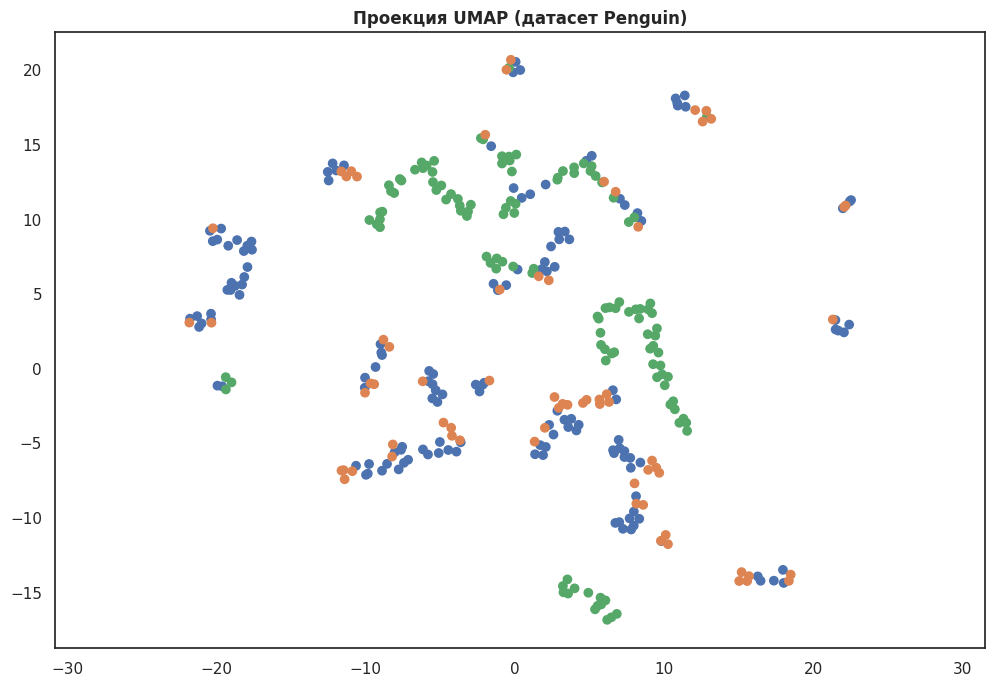

In [ ]:
# Создаем график
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Проекция UMAP (датасет Penguin)', fontsize=12, fontweight='bold')
plt.show()

## Кейс 3:
**min_dist= 0.1**

In [ ]:
embedding = umap.UMAP(n_neighbors=5, min_dist=0.1, metric= 'euclidean').fit_transform(penguin_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


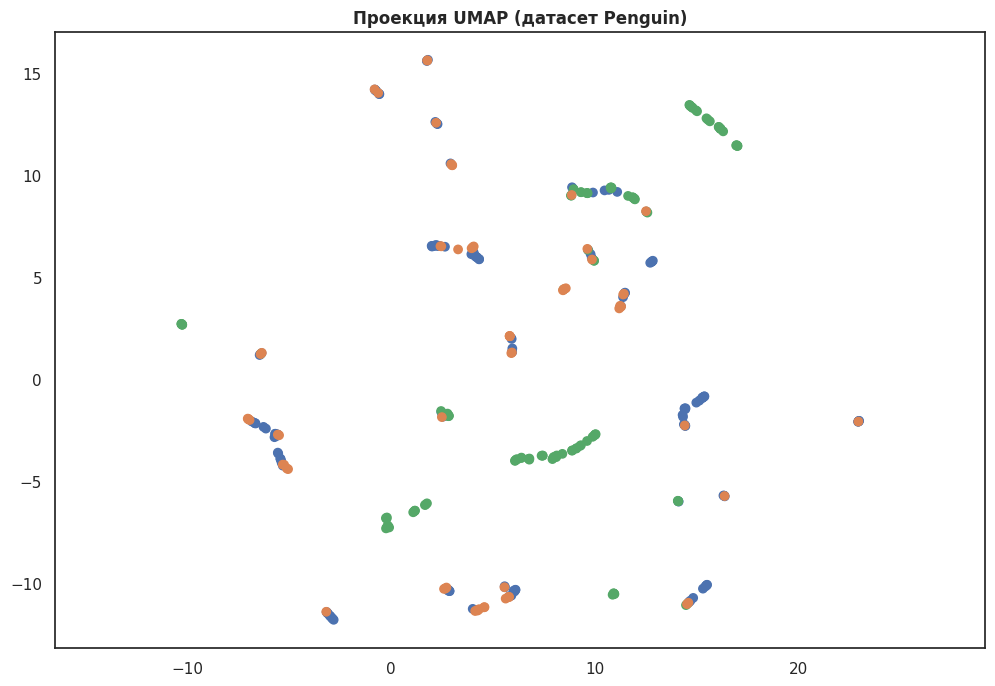

In [ ]:
# Создаем график
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Проекция UMAP (датасет Penguin)', fontsize=12, fontweight='bold')
plt.show()

## Кейс 4:
**n_neighbors= 2**
**min_dist= 0.1**

In [ ]:
embedding = umap.UMAP(n_neighbors=2, min_dist=0.1, metric= 'euclidean').fit_transform(penguin_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


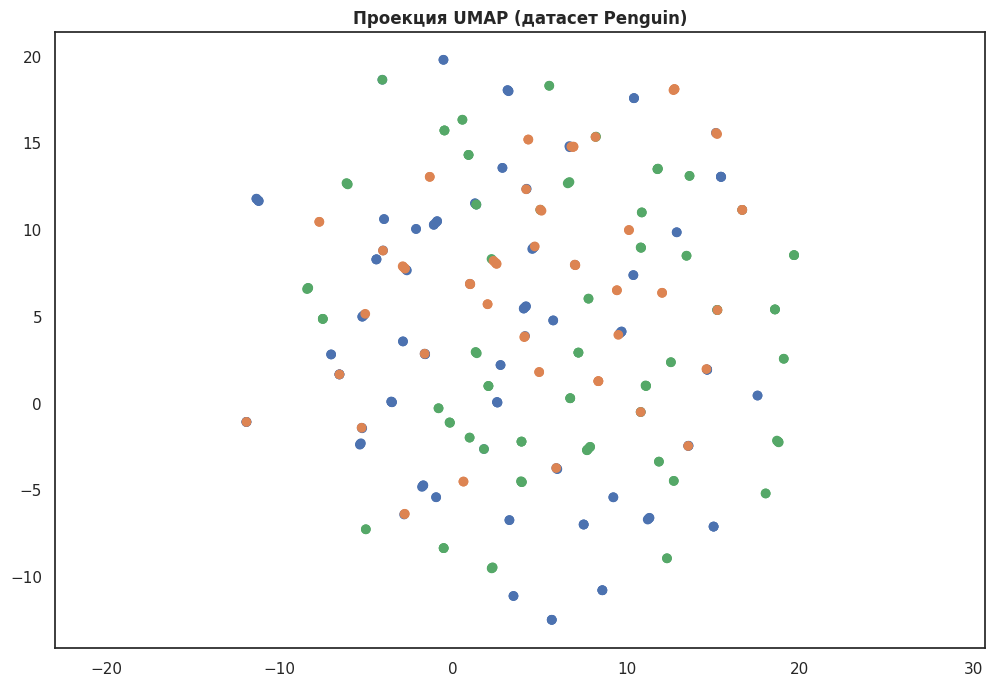

In [ ]:
# Создаем график
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Проекция UMAP (датасет Penguin)', fontsize=12, fontweight='bold')
plt.show()

Исходя из последнего рисунка при использовании параметра **n_neighbors=2** приводит к потери кластеризации. Это связано с тем, что при малых значениях данного параметра алгоритм UMAP 
ограничивается малой окрестностью вокруг каждой точки (т.е. акцент идет на локальную структуру данных).
Большие значения **n_neighbors** заставляют UMAP учитывать точки в большей 
окрестности, сохраняя глобальную структуру данных, но упуская локальные детали.


# DBSCAN

Использования датасета FASHION MNIST

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


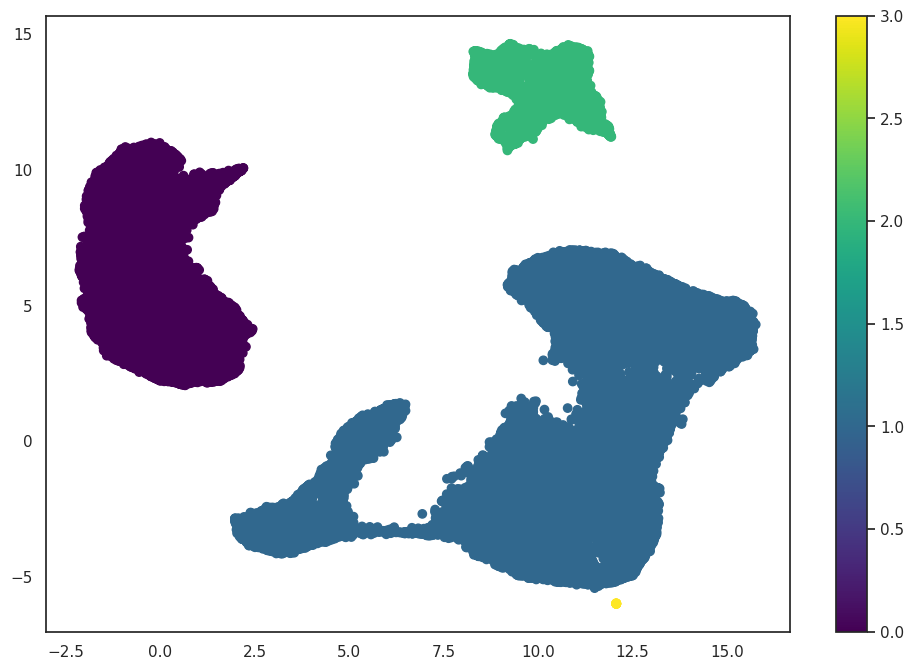

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml

# загрузка Fashion Mnist датасета
fashion_mnist = fetch_openml(name='Fashion-MNIST')

# уменьшаем размерность с помощью UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(fashion_mnist.data.astype(float))

# применяем DBSCAN для кластеризации
clusterer = DBSCAN(eps=0.5, min_samples=5)
labels = clusterer.fit_predict(embedding)

# создаем scatter plot с цветными точками для каждого кластера
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

Исходя от графика, который сгенерировал алгоритм DBSCAN, можно сделать вывод о том, что данный алгоритм хорошо выполняет процесс сегментирования данных. Однако ключевым минусом данного алгоритма является то, что он плохо сегментирует пересеченные данные (структуры). От этого следует, что DBSCAN выделил всего только 3 класса (и 1 выброс) датасета FASHION MNIST (когда в нем на самом деле 10 классов). Это прежде всего свящано с тем, что данный алгоритм, в отличии от UMAP, нацелен на кластеризацию данных и обнаружения выбросов, а не на снижение размерности и визуализацию данных.  


# Вывод о проделанно работе

Таким образом, UMAP и DBSCAN - это два разных алгоритма, которые используют разные методы для достижения своих целей. DBSCAN - это алгоритм кластеризации, который использует плотность данных для выявления кластеров. А UMAP - это алгоритм снижения размерности, который использует геометрические методы для визуализации данных.

Хотя некоторые эвристики, использованные в DBSCAN, могут быть полезны для UMAP (например, такие как число ближайших соседей **n_neighbors**), это не означает, что их можно просто скопировать. Некоторые эвристики могут быть бессмысленными или даже вредными для UMAP. Поэтому рекомендуется использовать эвристики, специфичные для UMAP, для его оптимизации.